# Entrenamiento CNN CIFAR-10

In [34]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [35]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Obtención dataset CIFAR10

El conjunto de datos CIFAR10 contiene 60 000 imágenes en color en 10 clases, con 6000 imágenes en cada clase. El conjunto de datos se divide en 50 000 imágenes de entrenamiento y 10 000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

In [36]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [37]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 25

## Exploración

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


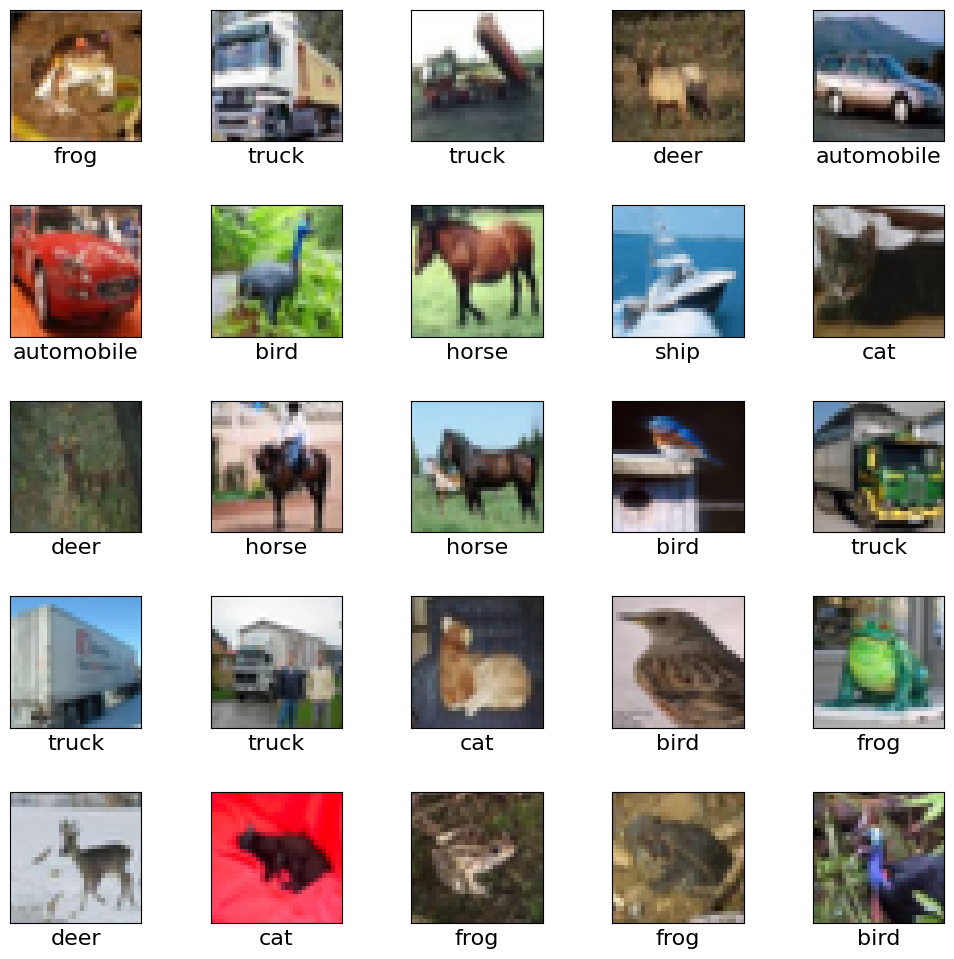

In [38]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

print(train_images.shape)

In [21]:
print(train_labels.shape)

(50000, 1)


In [22]:
print(test_images.shape)

(10000, 32, 32, 3)


In [23]:
print(test_labels.shape)

(10000, 1)


### Preprocesamiento

In [39]:
X_train = train_images
X_test = test_images

In [40]:
print(X_train.shape)

(50000, 32, 32, 3)


### Respuesta a vector

In [41]:
from keras.utils  import to_categorical

Y_train = to_categorical(train_labels, 10)
Y_test = to_categorical(test_labels, 10)

## Implementar arquitectura Fully Connected

In [42]:


from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten

In [43]:
# Modelo


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 256)       295168    
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 512)         1180160   
                                                      

In [46]:
# Entrenamiento

hist=model.fit(X_train, Y_train, epochs=20, batch_size=128, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 - 16s - loss: 1.8159 - accuracy: 0.3035 - val_loss: 5.3165 - val_accuracy: 0.4025 - 16s/epoch - 40ms/step
Epoch 2/20
391/391 - 13s - loss: 1.2559 - accuracy: 0.5486 - val_loss: 5.2188 - val_accuracy: 0.4754 - 13s/epoch - 32ms/step
Epoch 3/20
391/391 - 12s - loss: 1.0194 - accuracy: 0.6396 - val_loss: 5.1420 - val_accuracy: 0.4785 - 12s/epoch - 30ms/step
Epoch 4/20
391/391 - 12s - loss: 0.8509 - accuracy: 0.7014 - val_loss: 5.5245 - val_accuracy: 0.4889 - 12s/epoch - 32ms/step
Epoch 5/20
391/391 - 12s - loss: 0.7197 - accuracy: 0.7487 - val_loss: 8.0555 - val_accuracy: 0.4220 - 12s/epoch - 31ms/step
Epoch 6/20
391/391 - 12s - loss: 0.6252 - accuracy: 0.7811 - val_loss: 6.4529 - val_accuracy: 0.5126 - 12s/epoch - 31ms/step
Epoch 7/20
391/391 - 12s - loss: 0.5297 - accuracy: 0.8160 - val_loss: 5.7573 - val_accuracy: 0.5832 - 12s/epoch - 31ms/step
Epoch 8/20
391/391 - 12s - loss: 0.4554 - accuracy: 0.8414 - val_loss: 7.1978 - val_accuracy: 0.5529 - 12s/epoch - 30ms/step


In [52]:
# Evaluacion

# Evaluacionb
from sklearn.metrics import accuracy_score
#imprimimos el ultimo valor de accuracy
hist.history['accuracy'][-1]



0.9691200256347656

313/313 - 2s - loss: 12.6497 - accuracy: 0.6454 - 2s/epoch - 5ms/step


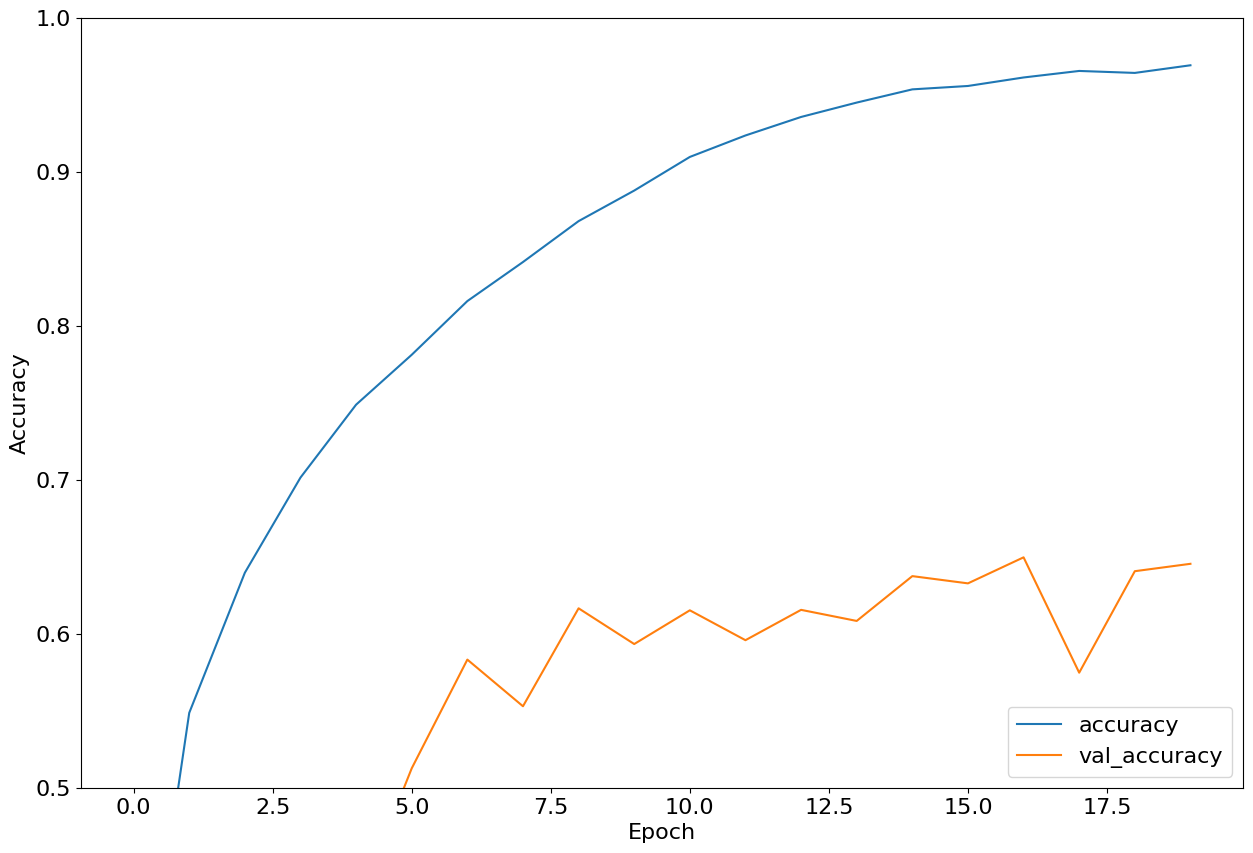

In [54]:
# grafico loss/accuracy v/s epoch
# grafico loss/accuracy v/s epoch

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)


Un fabuloso desempeño nos da por el método fully conected. Su desempeño es de 96,91%

## Implementar Arquitectura CNN

In [24]:
# Modelo
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten

#(train_images, train_labels), (test_images, test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# Entrenamiento
history = model.fit(train_images, train_labels, epochs=25, batch_size=128,
                   verbose=2, validation_data=(test_images, test_labels))


Epoch 1/25
391/391 - 5s - loss: 1.6287 - accuracy: 0.4013 - val_loss: 6.4321 - val_accuracy: 0.4307 - 5s/epoch - 12ms/step
Epoch 2/25
391/391 - 2s - loss: 1.2842 - accuracy: 0.5377 - val_loss: 6.8950 - val_accuracy: 0.4710 - 2s/epoch - 5ms/step
Epoch 3/25
391/391 - 2s - loss: 1.1513 - accuracy: 0.5916 - val_loss: 9.3518 - val_accuracy: 0.4324 - 2s/epoch - 5ms/step
Epoch 4/25
391/391 - 2s - loss: 1.0421 - accuracy: 0.6344 - val_loss: 7.0384 - val_accuracy: 0.5248 - 2s/epoch - 5ms/step
Epoch 5/25
391/391 - 2s - loss: 0.9570 - accuracy: 0.6643 - val_loss: 6.6906 - val_accuracy: 0.5528 - 2s/epoch - 6ms/step
Epoch 6/25
391/391 - 2s - loss: 0.8905 - accuracy: 0.6902 - val_loss: 8.5969 - val_accuracy: 0.4961 - 2s/epoch - 5ms/step
Epoch 7/25
391/391 - 2s - loss: 0.8381 - accuracy: 0.7087 - val_loss: 8.4453 - val_accuracy: 0.5263 - 2s/epoch - 5ms/step
Epoch 8/25
391/391 - 2s - loss: 0.7980 - accuracy: 0.7223 - val_loss: 6.5455 - val_accuracy: 0.5776 - 2s/epoch - 5ms/step
Epoch 9/25
391/391 - 2s

In [31]:
# Evaluacionb
from sklearn.metrics import accuracy_score
#imprimimos el ultimo valor de accuracy
history.history['accuracy'][-1]


0.8679599761962891

313/313 - 2s - loss: 10.9124 - accuracy: 0.5668 - 2s/epoch - 5ms/step


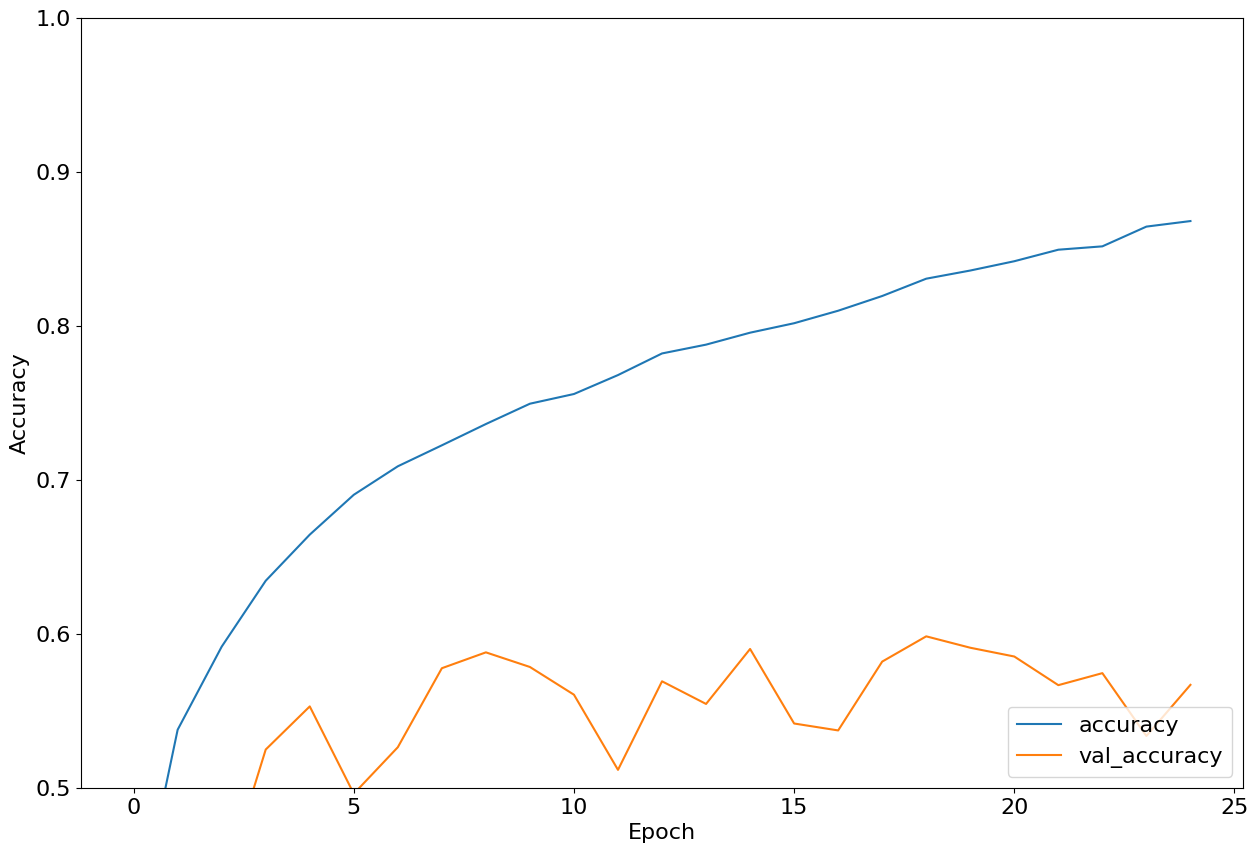

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# **Comentarios**
Se obtuvo un excelente desempeño de parte del modelo con un 86,79%

